#### `Gram–Schmidt` procedure

Given a set of `independent` $a_1, a_2,\cdots,a_k \in \mathbf{R}^n$,  Gram-Schmidt (G-S) finds `orthonomal` $q_1, q_2, \cdots, q_k \in \mathbf{R}^n$ such that

$$\text{span}(a_1, a_2, \cdots, a_r)=\text{span}(q_1, q_2, \cdots, q_r)$$ for $r\leq k$

`Concept`: sequentially orthogonalize each vector w.r.t. previous ones, from $a_1$

#### G-S `steps`

In [18]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

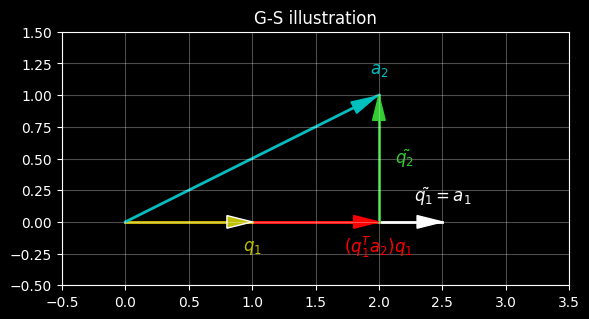

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))

# q_1
ax.plot([0, 1], [0,0], 'y', linewidth=2, zorder=0)
ax.arrow(1-0.2, 0, 0.001, 0, head_width=0.1, head_length=0.2, fc='y')
ax.text(1, -0.2, '$q_1$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='y')

# a_2
ax.plot([0, 2], [0,1], 'c', linewidth=2, zorder=0)
ax.arrow(2-0.2/1, 1-0.2/2, 0.002, 0.001, head_width=0.1, head_length=0.2, fc='c', ec='c')
ax.text(2, 1.2, "$a_2$", horizontalalignment='center', verticalalignment='center', fontsize=12, color='c')

# a_1
ax.plot([0, 2.5], [0,0], 'w', linewidth=2, zorder=-3)
ax.arrow(2.5-0.2, 0, 0.001, 0, head_width=0.1, head_length=0.2, fc='w', ec='w')
ax.text(2.5, 0.2, r'$\tilde{q_1}=a_1$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='w')

# q_1 component in a_2
ax.plot([0, 2], [0,0], 'r', linewidth=2, zorder=-3)
ax.arrow(2-0.2, 0, 0.001, 0, head_width=0.1, head_length=0.2, fc='r', ec='r')
ax.text(2, -0.2, '$(q_1^Ta_2)q_1$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='r')

# q_2
ax.plot([2, 2], [0,1], 'limegreen', linewidth=2, zorder=-3)
ax.arrow(2, 1-0.2, 0.000, 0.001, head_width=0.1, head_length=0.2, fc='limegreen', ec='limegreen')
ax.text(2.2, 0.5, r'$\tilde{q_2}$', horizontalalignment='center', verticalalignment='center', fontsize=12, color='limegreen')

ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')

ax.grid(True, alpha=0.3)
ax.set_title('G-S illustration')

plt.tight_layout()
plt.show()

* set $\tilde{q_1}=a_1$
* `normalize` to get $q_1$
$$q_1=\frac{\tilde{q_1}}{\|\tilde{q_1}\|}$$
* `remove` component of $a_2$ in $q_1$ direction
* first, use $q_1^Ta_2$ to get projection length of $a_2$ along direction of $q_1$ (as $a_2$ can be decomposed into direction along $q_1$, and direction $\perp q_1$), this is a `scalar`
* second, component of $a_2$ in $q_1$ direction is obtained as $q_1^Ta_2q_1$, this is a `vector`
$$\tilde{q_2}=a_2-(q_1^Ta_2)q_1$$
* `normalize` to get $q_2$
$$q_2=\frac{\tilde{q_2}}{\|\tilde{q_2}\|}$$
* `remove` components of $a_3$ in $q_1, q_2$ directions
$$\tilde{q_3}=a_3-(q_1^Ta_3)q_1-(q_2^Ta_3)q_2$$
* `normalize` to get $q_3$
$$q_3=\frac{\tilde{q_3}}{\|\tilde{q_3}\|}$$
* and so on...

#### Example

In [20]:
def gram_schmidt(A):
    # Columns of A are independent
    n = A.shape[1]
    Q = np.zeros_like(A)
    R = np.zeros((n, n))

    for i in range(n):
        # Loop over all a_i
        q = A[:, i].copy()

        # Remove components of a in directions of previous q's
        # This skips when i=0
        for j in range(i):
            # Find coefficient of a_i in q_j direction
            R[j, i] = np.dot(Q[:, j], A[:, i])
            # Remove component of a_i in q_j direction
            q -= R[j, i] * Q[:, j]

        # Normalize
        R[i, i] = np.sqrt(np.dot(q, q))
        q /=  R[i, i]
        Q[:, i] = q

    return Q, R

In [21]:
square_A=False

if square_A:
    A = np.array([[1.0, 2.0, 3.0, 4.0],
                  [4.0, 1.0, 0.0, -1.0],
                  [3.0, 5.0, -2.0, 1.0],
                  [2.0, 0.0, 1.0, 2.0]])
else:
    A = np.array([[1.0, 2.0, 3.0],
                  [4.0, 1.0, 0.0],
                  [3.0, 5.0, -2.0],
                  [2.0, 0.0, 1.0]])

Q, R = gram_schmidt(A)

print("Orthonormal basis Q:")
print(Q)

print("\nUpper triangular matrix R:")
print(R)

# Verify Q is orthonormal
print(f"\nQ^TQ:\n{np.dot(Q.T, Q)}")
print(f"Norms: \n{np.linalg.norm(Q, axis=0)}")

# Verify that A = QR
A_reconstructed = np.dot(Q, R)
print("\nOriginal matrix A:")
print(A)
print("\nReconstructed matrix A from Q and R:")
print(A_reconstructed)

Orthonormal basis Q:
[[ 0.1826  0.3324  0.9102]
 [ 0.7303 -0.4602 -0.0700]
 [ 0.5477  0.7414 -0.3501]
 [ 0.3651 -0.3579  0.2100]]

Upper triangular matrix R:
[[ 5.4772  3.8341 -0.1826]
 [ 0.0000  3.9115 -0.8437]
 [ 0.0000  0.0000  3.6407]]

Q^TQ:
[[ 1.0000  0.0000  0.0000]
 [ 0.0000  1.0000 -0.0000]
 [ 0.0000 -0.0000  1.0000]]
Norms: 
[ 1.0000  1.0000  1.0000]

Original matrix A:
[[ 1.0000  2.0000  3.0000]
 [ 4.0000  1.0000  0.0000]
 [ 3.0000  5.0000 -2.0000]
 [ 2.0000  0.0000  1.0000]]

Reconstructed matrix A from Q and R:
[[ 1.0000  2.0000  3.0000]
 [ 4.0000  1.0000 -0.0000]
 [ 3.0000  5.0000 -2.0000]
 [ 2.0000 -0.0000  1.0000]]


#### Express $a_i$ as `linear combination` of $q_1,\cdots, q_i$

$$\boxed{a_i = (q_1^Ta_i)q_1 + (q_2^Ta_i)q_2 +\cdots+ (q_{i-1}^Ta_i)q_{i-1} + \|\tilde{q_i}\|q_i}$$

Let $q_j^Ta_i=r_{ji}$ and $\|\tilde{q_i}\|=r_{ii}$, we have

$$a_i = r_{1i}q_1 + r_{2i}q_2 +\cdots+ r_{(i-1)i}q_i+ r_{ii}q_i$$